# NTSCRAPER

In [1]:
from ntscraper import Nitter
from pprint import pprint
import pandas as pd

In [2]:
scraper = Nitter(log_level = 1,skip_instance_check= False)
tweets = scraper.get_tweets("trump",mode="term",number=20)

Testing instances: 100%|██████████| 77/77 [05:16<00:00,  4.10s/it]

19-Jul-24 11:28:25 - No instance specified, using random instance https://nitter.privacydev.net


19-Jul-24 11:28:32 - Current stats for trump: 17 tweets, 0 threads...
19-Jul-24 11:28:37 - Current stats for trump: 20 tweets, 0 threads...


In [3]:
pprint(tweets)

{'threads': [],
 'tweets': [{'date': 'Jul 19, 2024 · 1:22 AM UTC',
             'external-link': '',
             'gifs': [],
             'is-pinned': False,
             'is-retweet': True,
             'link': 'https://twitter.com/GuntherEagleman/status/1814108423933272247#m',
             'pictures': [],
             'quoted-post': {},
             'replying-to': [],
             'stats': {'comments': 1116,
                       'likes': 34176,
                       'quotes': 258,
                       'retweets': 7415},
             'text': 'BREAKING: President Trump shooter Thomas Crooks had “3 '
                     'encrypted overseas accounts”  - Rep. Michael Waltz   He '
                     'did not act alone',
             'user': {'avatar': 'https://pbs.twimg.com/profile_images/1606836521784512512/Xb-_cXXi_bigger.jpg',
                      'name': 'Gunther Eagleman™',
                      'profile_id': '1606836521784512512',
                      'username': '@Gunther

In [6]:
bezos_information = scraper.get_profile_info("JeffBezos")
bezos_information

15-Jul-24 09:30:20 - No instance specified, using random instance https://nitter.privacydev.net


{'image': 'https://pbs.twimg.com/profile_images/1591558315254890500/ETIHb4Nl_400x400.jpg',
 'name': 'Jeff Bezos',
 'username': '@JeffBezos',
 'id': '15506669',
 'bio': 'Amazon. Blue Origin. Washington Post. Bezos Earth Fund. Bezos Academy.',
 'location': '',
 'website': 'https://hoo.be/jeffbezos',
 'joined': '10:38 PM - 20 Jul 2008',
 'stats': {'tweets': 399,
  'following': 374,
  'followers': 6330232,
  'likes': 178,
  'media': 0}}

# SNSCRAPE

In [1]:
import snscrape.modules.twitter as sntwitter
import itertools
import pandas as pd

In [19]:
# Creating list to append tweet data 
tweets_list1 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterTrendsScraper('elonmusk')).get_items(): #declare a username 
    if i>1000: #number of tweets you want to scrape
        break
    tweets_list1.append([tweet.date, tweet.id, tweet.content, tweet.user.username]) #declare the attributes to be returned
    
# Creating a dataframe from the tweets list above 
tweets_df1 = pd.DataFrame(tweets_list1, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

TypeError: TwitterTrendsScraper.__init__() takes 1 positional argument but 2 were given

In [21]:
import os
# Setting variables to be used in format string command below
tweet_count = 100
username = "Accenture"

# Using OS library to call CLI commands in Python
os.system("snscrape --jsonl --max-results {} twitter-search 'from:{}'> user-tweets.json".format(tweet_count, username))

1

In [22]:
# Reads the json generated from the CLI command above and creates a pandas dataframe
tweets_df1 = pd.read_json('user-tweets.json', lines=True)

# Displays first 5 entries from dataframe
tweets_df1.head()

""


In [26]:
# Setting variables to be used in format string command below
tweet_count = 100
text_query = "covid"


# Using OS library to call CLI commands in Python
os.system('snscrape --max-results {} twitter-hashtag {}'.format(tweet_count,text_query))

1

In [24]:
# Reads the json generated from the CLI command above and creates a pandas dataframe
tweets_df2 = pd.read_json('text-query-tweets.json', lines=True)

# Displays first 5 entries from dataframe
tweets_df2.head()

""


# Selenium

In [32]:
#Do imports
import numpy as np
import pandas as pd
import time
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

In [72]:
s=Service('C:\\SAINS DATA\\msedgedriver.exe')
options = webdriver.EdgeOptions()
options.add_experimental_option("detach", True)
options.add_argument('disable_infobars')

# Set driver and initial array 
driver = webdriver.Edge(service=s, options=options)
driver.get("https://x.com/tanyarlfes") #input the url you wanna scrappe here

time.sleep(8) #change according to your pc and internet connection

tweet_text = []

# driver.execute_script("window.scrollTo(0, 2160)")
time.sleep(1)

# TEXT
while True:
    driver.execute_script("window.scrollTo(0, 1080)")
    text = driver.find_elements(By.CSS_SELECTOR, 'div[data-testid="tweetText"]')
    for i in text:
        tweet_text.append(i.text)
    
    if len(set(tweet_text)) > 20:
        break

driver.close()


StaleElementReferenceException: Message: stale element reference: stale element not found in the current frame
  (Session info: MicrosoftEdge=126.0.2592.102); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
	GetHandleVerifier [0x00007FF6C3A98132+13538]
	Microsoft::Applications::Events::EventProperty::~EventProperty [0x00007FF6C3A21DE9+595465]
	(No symbol) [0x00007FF6C383E6CF]
	(No symbol) [0x00007FF6C38437C9]
	(No symbol) [0x00007FF6C38456CB]
	(No symbol) [0x00007FF6C3845770]
	(No symbol) [0x00007FF6C387D38B]
	(No symbol) [0x00007FF6C38A1FFA]
	(No symbol) [0x00007FF6C3878147]
	(No symbol) [0x00007FF6C387800D]
	(No symbol) [0x00007FF6C38A22E0]
	(No symbol) [0x00007FF6C3878147]
	(No symbol) [0x00007FF6C38BB1EE]
	(No symbol) [0x00007FF6C38A1C63]
	(No symbol) [0x00007FF6C387766E]
	(No symbol) [0x00007FF6C387683C]
	(No symbol) [0x00007FF6C3877221]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF6C3C596D4+1099860]
	Microsoft::Applications::Events::EventProperty::~EventProperty [0x00007FF6C399D8FC+53532]
	Microsoft::Applications::Events::EventProperty::~EventProperty [0x00007FF6C3990E25+1605]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF6C3C58665+1095653]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF6C3A2C961+27777]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF6C3A26CE4+4100]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF6C3A26E1B+4411]
	Microsoft::Applications::Events::EventProperty::~EventProperty [0x00007FF6C3A1CFA0+575424]
	BaseThreadInitThunk [0x00007FFB10E9257D+29]
	RtlUserThreadStart [0x00007FFB1222AF28+40]


In [73]:
tweet_text

[' MEREKA SERASI BGT GA SII AAAA mana anaknya mirip bapaknya. Katanya anak bakal mirip sm ortu yg rasa cintanya paling besar\nKeliatan sih bininya glowing bgt psti dicintai mati2an dan dimanjain sm suaminya',
 ' Pertama kali deket sma cowo jawa, kmren ketemuan, dia wangi bgt, gw sebenernya salting tp karna gw barbar banyak hal yg gw malu kalo inget, tp ketolong karna dia ketawa, gw pikir dia bakalan illfeel, taunya di chat gini',
 'n g a k a k  ',
 ' MEREKA SERASI BGT GA SII AAAA mana anaknya mirip bapaknya. Katanya anak bakal mirip sm ortu yg rasa cintanya paling besar\nKeliatan sih bininya glowing bgt psti dicintai mati2an dan dimanjain sm suaminya',
 ' Pertama kali deket sma cowo jawa, kmren ketemuan, dia wangi bgt, gw sebenernya salting tp karna gw barbar banyak hal yg gw malu kalo inget, tp ketolong karna dia ketawa, gw pikir dia bakalan illfeel, taunya di chat gini',
 'n g a k a k  ',
 ' MEREKA SERASI BGT GA SII AAAA mana anaknya mirip bapaknya. Katanya anak bakal mirip sm ortu y

In [68]:
len(set(tweet_text))

6

In [54]:
s=Service('C:\\SAINS DATA\\msedgedriver.exe')
options = webdriver.EdgeOptions()
options.add_experimental_option("detach", True)
options.add_argument('disable_infobars')

# Set driver and initial array 
driver = webdriver.Edge(service=s, options=options)
driver.get("https://x.com/tanyarlfes") #input the url you wanna scrappe here

time.sleep(3) #change according to your pc and internet connection

x_uname = 'NewbyBen2962'
x_pass = '6hxNQCUWc2YmVih'

tweets = []
result = False
    
# Get scroll height after first time page load
last_height = driver.execute_script("return document.body.scrollHeight")

last_elem=''
current_elem=''

while True:
    
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    # Wait to load page
    time.sleep(4)
    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
    
    #update all_tweets to keep loop
    all_tweets = driver.find_elements(By.XPATH, '//div[@data-testid]//article[@data-testid="tweet"]')

    for item in all_tweets[1:]: # skip tweet already scrapped
        
        # #
        # print('--- text ---')
        # try:
        #     uname = item.find_element(By.CSS_SELECTOR, 'div[class = "css-175oi2r r-1d09ksm r-18u37iz r-1wbh5a2"]').text
        # except:
        #     uname = '[empty]'
        
        # #DATE
        # print('--- date ---')
        # try:
        #     date = item.find_element(By.XPATH, './/time').text
        # except:
        #     date = '[empty]'
        # print(date)

        # TEXT
        print('--- text ---')
        try:
            text = item.find_element(By.CSS_SELECTOR, 'div[data-testid="tweetText"]').text
        except:
            text = '[empty]'
        print(text)

        # # REPLY
        # print('--- replying_to ---')
        # try:
        #     replying_to = item.find_element(By.XPATH, './/div[contains(text(), "Replying to")]//a').text
        # except:
        #     replying_to = '[empty]'
        # print(replying_to)
    
        #Append new tweets replies to tweet array
        tweets.append([text])
        if (last_elem == current_elem):
            result = True
        else:
            last_elem = current_elem


# df = pd.DataFrame(tweets, columns=['Username', 'Replying to', 'Tweet', 'Date of Tweet'])
# df.to_csv('Tweets.csv', index=False, encoding='utf-8') #save a csv file in the downloads folder, change it to your structure and desired folder

# print(df)

--- text ---
  Wow semakin menjadi2 
--- text ---
 cw // kpop, genos*de, z1onist

Sok siapa lagi artis yg terang2an pake/endorse produk israhell? Spill di komen biar yg lain pada tau. Kita boikot rame2!! 

 
--- text ---
 siapa yg prnh??? hehe sender prnh 
--- text ---
 bagi meme bucin dong guys, aku semalem baru aja jadian sama crushku 


In [55]:
tweets

[['  Wow semakin menjadi2 '],
 [' cw // kpop, genos*de, z1onist\n\nSok siapa lagi artis yg terang2an pake/endorse produk israhell? Spill di komen biar yg lain pada tau. Kita boikot rame2!! \n\n '],
 [' siapa yg prnh??? hehe sender prnh '],
 [' bagi meme bucin dong guys, aku semalem baru aja jadian sama crushku ']]

# Twikit

In [2]:
import asyncio
from twikit import Client
import time
import datetime
import random


## Login

In [151]:
USERNAME = 'VKriegshau86096'
EMAIL = 'tvhmxwjd@senoramail.com'
PASSWORD = 'zPHDJFaq'

# Initialize client
client = Client('en-US')

await client.login(
        auth_info_1=USERNAME,
        auth_info_2=EMAIL,
        password=PASSWORD
    )
client.save_cookies('cookies.json')

# async def main():
#     await client.login(
#         auth_info_1=USERNAME,
#         auth_info_2=EMAIL,
#         password=PASSWORD
#     )
# await main()
# client.save_cookies('cookies.json')

Use your code generator app to generate a code and enter it below.


## Get Tweets from Term

In [3]:
client = Client('en-US')
client.load_cookies('cookies.json')

In [149]:
async def main():
    client.load_cookies('cookies.json')
    current_time = datetime.datetime.now()
    time_change = datetime.timedelta(minutes=20) 
    new_time = current_time + time_change 
    new_time = new_time.time()
    next_iteration_time = new_time.strftime("%H:%M")

    username = []
    text = []
    date = []
    rep = []
    reply_count = []
    retweet_count = []
    view = []

    iterasi = 1
    tweets = await client.search_tweet('Dali since:2024-07-20', 'Latest', 20)

    while True:
        more_tweets = await tweets.next()
        for tweet in more_tweets:
            username.append(tweet.user.screen_name)
            text.append(tweet.text)
            date.append(tweet.created_at_datetime)
            rep.append(tweet.in_reply_to)
            reply_count.append(tweet.reply_count)
            view.append(tweet.view_count)
            retweet_count.append(tweet.retweet_count)

        df_twikit = pd.DataFrame({'uname':username,
                            'text':text,
                            'date':date,
                            'reply':rep,
                            'reply_count':reply_count,
                            'view_count':view,
                            'retweet_count':retweet_count})
        
        print(f'iterasi ke-{iterasi} -> terambil {len(username)} tweet')
        
        
        if iterasi == 50:
            print(f'ratelimit is reached, run again at {next_iteration_time}')
            break
        
        iterasi = iterasi+1
        time.sleep(random.randint(1,4))
        
    return df_twikit
        


In [150]:
await main()

Unauthorized: status: 401, message: "{"errors":[{"message":"Could not authenticate you","code":32}]}
"

In [120]:
current_time = datetime.datetime.now()
time_change = datetime.timedelta(minutes=16) 
new_time = current_time + time_change 
new_time = new_time.time()
next_iteration_time = new_time.strftime("%H:%M")

username = []
text = []
date = []
rep = []
place = []
view = []

# num_of_data = 1000
iterasi = 1
tweets = await client.search_tweet('Dali', 'Top', 20)

while True:
    more_tweets = await tweets.next()
    for tweet in more_tweets:
        username.append(tweet.user.screen_name)
        text.append(tweet.text)
        date.append(tweet.created_at_datetime)
        rep.append(tweet.in_reply_to)
        place.append(tweet.place)
        view.append(tweet.view_count)

    df_twikit = pd.DataFrame({'uname':username,
                        'text':text,
                        'date':date,
                        'reply':rep,
                        'place':place,
                        'view_count':view})
    
    print(f'iterasi ke-{iterasi} -> terambil {len(username)} tweet')
    iterasi = iterasi+1
    
    if iterasi == 50:
        print(f'ratelimit is reached, run again at {next_iteration_time}')
        break


iterasi ke-1 -> terambil 19 tweet
iterasi ke-2 -> terambil 38 tweet
iterasi ke-3 -> terambil 57 tweet
iterasi ke-4 -> terambil 76 tweet
iterasi ke-5 -> terambil 95 tweet
iterasi ke-6 -> terambil 114 tweet
iterasi ke-7 -> terambil 133 tweet
iterasi ke-8 -> terambil 152 tweet
iterasi ke-9 -> terambil 171 tweet


AccountSuspended: status: 429, message: "{"errors":[{"code":88,"message":"Rate limit exceeded."}]}"

In [134]:
df_twikit.head(50)

,uname,text,date,reply,place,view_count
0,BolaBolaSepak_,"Kamari🥹, sedih bgt liat kamu bisa senyum gitu ...",2024-07-21 09:41:41+00:00,None,None,68026
1,BolaBolaSepak_,Nyesek Liat Kak Jennifer pelukan sama Yaya🥹😭\n...,2024-07-21 08:20:24+00:00,None,None,221964
2,bigsecretw0rld,we love you Jennifer and Kamari 🥹❤️ \nRest in ...,2024-07-21 08:36:22+00:00,None,None,205344
3,Binda_6,you are so lucky to have a good father papa da...,2024-07-20 14:02:24+00:00,None,None,126256
4,BolaBolaSepak_,"kuajari kau berdiri ditanganku, dan melangkah ...",2024-07-21 07:17:48+00:00,None,None,336538
5,shiningjaemz,kamari saying bye bye to his papa dali… her ve...,2024-07-19 11:08:58+00:00,None,None,6111162
6,nxeyszlaura,Be a nice girl kamari. Papa dali love you so m...,2024-07-19 17:17:09+00:00,None,None,341433
7,BolaBolaSepak_,Kak Jennifer bilang ternyata mukbang mashed po...,2024-07-21 08:35:39+00:00,None,None,375417
8,BolaBolaSepak_,"papa Dali, kamu harus liat perempuan kuat kamu...",2024-07-21 10:02:30+00:00,None,None,27091
9,idolsapaaja,Ngeliat Yaya tetiba nyium and meluk mamari aja...,2024-07-21 09:45:03+00:00,None,None,18520


In [135]:
df_twikit.to_csv('twikit.csv', index=False)

## Get Tweets from User

- tanyarlfes -> 2.3 juta followers
- tanyakanrl -> 2.3 juta followers
- collegemfs -> 91.2 ribu followers
- tubirfess -> 667 ribu followers
- worksfess -> 974.2 ribu followers
- convomf -> 1.5 juta followers
- Askrlfess -> 758.9 ribu followers
- baseconvo -> 52.2 ribu followers

target per akun akan diambil 3000 tweets (dikonfirmasi dulu)

In [5]:
async def main():
    client.load_cookies('cookies.json')
    current_time = datetime.datetime.now()
    time_change = datetime.timedelta(minutes=20) 
    new_time = current_time + time_change 
    new_time = new_time.time()
    next_iteration_time = new_time.strftime("%H:%M")

    username = []
    text = []
    date = []
    rep = []
    likes = []
    reply_count = []
    retweet_count = []
    view = []
    language = []

    iterasi = 2
    total_iterations = 0  # Variabel untuk mencatat total jumlah iterasi
    user = await client.get_user_by_screen_name('tanyarlfes')
    tweets_from_user = await user.get_tweets('Tweets', 40)
    
    for t in tweets_from_user:
        username.append(t.user.screen_name)
        text.append(t.full_text)
        date.append(t.created_at_datetime)
        language.append(t.lang)
        rep.append(t.in_reply_to)
        likes.append(t.favorite_count)
        reply_count.append(t.reply_count)
        view.append(t.view_count)
        retweet_count.append(t.retweet_count)
    

    while True:
        try:
            more_tweets_from_user = await tweets_from_user.next()
            for tweet in more_tweets_from_user:
                username.append(tweet.user.screen_name)
                text.append(tweet.full_text)
                date.append(tweet.created_at_datetime)
                language.append(tweet.lang)
                rep.append(tweet.in_reply_to)
                likes.append(tweet.favorite_count)
                reply_count.append(tweet.reply_count)
                view.append(tweet.view_count)
                retweet_count.append(tweet.retweet_count)

            df_twikit_user = pd.DataFrame({'uname':username,
                                'text':text,
                                'date':date,
                                'language':language,
                                'reply':rep,
                                'likes':likes,
                                'reply_count':reply_count,
                                'view_count':view,
                                'retweet_count':retweet_count})
            
            print(f'Pencarian ke-{iterasi} -> terambil {len(username)} tweet')
            
            total_iterations += 1  # Tambahkan total iterasi
            
            if len(username) > 5000:
                print(f'Total tweets gathered {len(username)}. Stopping the script.')
                break
            
            if iterasi == 50:
                print(f'Rate limit reached. Waiting for approximately 20 minutes.')
                await asyncio.sleep(random.randint(19,21) * 60)  # Delay for 20 minutes
                iterasi = 0
                
            
            iterasi = iterasi+1
            time.sleep(random.randint(1,4))
            
        except Exception as e:
            print(f'{e}!, run again at {next_iteration_time}')
            break
        
    print(f'Total jumlah iterasi: {total_iterations}')    
    return df_twikit_user
        


In [7]:
df_twikit_user = await main()
df_twikit_user.head() 

23-Jul-24 14:17:36 - HTTP Request: GET https://twitter.com/i/api/graphql/NimuplG1OB7Fd2btCLdBOw/UserByScreenName?variables=%7B%22screen_name%22%3A%20%22tanyarlfes%22%2C%20%22withSafetyModeUserFields%22%3A%20false%7D&features=%7B%22hidden_profile_likes_enabled%22%3A%20true%2C%20%22hidden_profile_subscriptions_enabled%22%3A%20true%2C%20%22responsive_web_graphql_exclude_directive_enabled%22%3A%20true%2C%20%22verified_phone_label_enabled%22%3A%20false%2C%20%22subscriptions_verification_info_is_identity_verified_enabled%22%3A%20true%2C%20%22subscriptions_verification_info_verified_since_enabled%22%3A%20true%2C%20%22highlights_tweets_tab_ui_enabled%22%3A%20true%2C%20%22responsive_web_twitter_article_notes_tab_enabled%22%3A%20false%2C%20%22creator_subscriptions_tweet_preview_api_enabled%22%3A%20true%2C%20%22responsive_web_graphql_skip_user_profile_image_extensions_enabled%22%3A%20false%2C%20%22responsive_web_graphql_timeline_navigation_enabled%22%3A%20true%7D&fieldToggles=%7B%22withAuxiliaryU

,uname,text,date,language,reply,likes,reply_count,view_count,retweet_count
0,tanyarlfes,💚 Ada yang tau beli ini dimana? Atau ada yang ...,2024-07-23 06:45:57+00:00,in,None,7,5,3160,1
1,tanyarlfes,💚 Telah jatuh dan hilang totebag merah tulisan...,2024-07-23 06:18:57+00:00,in,None,6,2,2699,5
2,tanyarlfes,💚 Bnyak yg bilang thinkpad itu langganan anak ...,2024-07-23 05:54:08+00:00,in,None,17,6,3787,1
3,tanyarlfes,💚 hallo buat kalian ciwi ciwi yang maen dattin...,2024-07-23 04:52:35+00:00,in,None,60,32,14002,14
4,tanyarlfes,💚 kpop // serius nanya kalian yg boycot idol y...,2024-07-23 04:17:51+00:00,in,None,49,42,13333,5


In [18]:
df_twikit_user[df_twikit_user.duplicated()].iloc[0, 1]

'lagi sedih kenapa?\n\n💚'

In [21]:
df_tanyarlfes = df_twikit_user.copy()
df_tanyarlfes.head()

,uname,text,date,language,reply,likes,reply_count,view_count,retweet_count
0,tanyarlfes,💚 Ada yang tau beli ini dimana? Atau ada yang ...,2024-07-23 06:45:57+00:00,in,None,7,5,3160,1
1,tanyarlfes,💚 Telah jatuh dan hilang totebag merah tulisan...,2024-07-23 06:18:57+00:00,in,None,6,2,2699,5
2,tanyarlfes,💚 Bnyak yg bilang thinkpad itu langganan anak ...,2024-07-23 05:54:08+00:00,in,None,17,6,3787,1
3,tanyarlfes,💚 hallo buat kalian ciwi ciwi yang maen dattin...,2024-07-23 04:52:35+00:00,in,None,60,32,14002,14
4,tanyarlfes,💚 kpop // serius nanya kalian yg boycot idol y...,2024-07-23 04:17:51+00:00,in,None,49,42,13333,5


In [22]:
df_tanyarlfes.to_csv('tanyarlfes.csv', index=False)

In [30]:
df_tanyarlfes_no_duplicate = df_tanyarlfes.drop_duplicates(subset=['text'])
df_tanyarlfes_no_duplicate.sort_values(by='likes', ascending=False)

,uname,text,date,language,reply,likes,reply_count,view_count,retweet_count
26,tanyarlfes,aku ada utang puasa dri kls 6 sd sampe sekaran...,2024-07-22 13:23:42+00:00,in,None,11518,387,1113017,601
19,tanyarlfes,💚 T i t i p a n\n\nWandahara udah klarifikasi ...,2024-07-22 14:08:15+00:00,in,None,2619,430,426329,64
12,tanyarlfes,"💚 ini sembuhnya gimana ya, 3 tahun ga ada harg...",2024-07-22 16:05:03+00:00,in,None,1516,314,97160,31
20,tanyarlfes,KKN ber 9 orang (cewe) dirumah warga yg tingga...,2024-07-22 14:07:39+00:00,in,None,1217,76,68957,19
22,tanyarlfes,"choose one, pilih kopi atau balikan sama manta...",2024-07-22 14:06:20+00:00,in,None,497,1421,145993,18
29,tanyarlfes,pliss tanggepan kalian gimana?\n\n💚 https://t....,2024-07-22 11:31:38+00:00,in,None,486,63,25625,10
30,tanyarlfes,yg bikin kamu happy selain uang apa?\n\n 💚,2024-07-22 11:16:41+00:00,in,None,465,963,121292,17
5,tanyarlfes,Buat lu pada yg tingginya 165+ 170+ 175+ kalau...,2024-07-23 03:51:15+00:00,in,None,373,293,51415,12
18,tanyarlfes,💚 https://t.co/URRpjOg21a,2024-07-22 14:09:04+00:00,qme,None,326,465,70717,40
8,tanyarlfes,💚 kalian pernah ga si saking sakit hatinya amp...,2024-07-23 00:55:54+00:00,in,None,255,72,18580,14


# PyTweetToolkit

In [1]:
from PyTweetToolkit import PyTweetClient

# Replace YOUR_AUTH_TOKEN and YOUR_CSRF_TOKEN with the actual values.
auth_token = "dd51a96e7ebed505829a2f944787abd7220c8291"
csrf_token = "5558749a08c4ec1f5ae23c045c1e1a5def5735e6bd4d00c9fb32e2642eed551146d6cd2fa4da02c1a36cd557ee20352f770b89717912ee74eb79524471e807bfbc5993d3dcf136112f3f119b1a95e231"

client = PyTweetClient(auth_token=auth_token, csrf_token=csrf_token)

In [6]:
# Searching for tweets with the hashtag #Python
search_query = "#Python"
tweets, next_cursor, previous_cursor = client.search_latest(query=search_query)

print("Latest tweets about Python:")
for tweet in tweets:
    print(f"- {tweet.full_text[:50]}...")

Latest tweets about Python:
- DSA Quiz:

When converting a recursive algorithm t...
- FizzBuzz Python Program https://learnprogramming.i...
- pythonã®è¾æ¸åãã¾ã æ£ãã¦ããªããã...
- Pay us to handle your:
English
#essaypay
#Math
#Ch...
- Odd or Even Number Checker in Python https://learn...
- linear search and binary search in #Python program...
- Pay us to handle your:
English
#essaypay
#Math
#Ch...
- Get reliable assistance with;
#Research
Project
#T...
- #BrahmaTechnolab #angularjs #angular #javascript #...
- ðï¸58/n of LC:             

* LC 2416
* Diffi...
- ðï¸58/n of LC:             

* LC 677
* Diffic...
- ðï¸59/n of LC:             

* LC 2191 (POTD) ...
- Pay us to handle your:
English
#essaypay
#Math
#Ch...
- Python List Methods https://morioh.com/a/bb810d8dd...
- Qq complaint do you have??
Account Hacked?
Wrong P...
- Reach us for:
calculus pay
Finance pay
physics pay...
- Diiiia 5. hoje foi dia de loop.
Estando meio doent...
- Python is a high-l

In [97]:
import datetime
import pandas as pd
import time
import random
import asyncio


current_time = datetime.datetime.now()
time_change = datetime.timedelta(minutes=19)
new_time = current_time + time_change
new_time = new_time.time()
next_iteration_time = new_time.strftime("%H:%M")

username_toolkit = []
text_toolkit = []
date_toolkit = []
rep_toolkit = []
likes_toolkit = []
reply_count_toolkit = []
retweet_count_toolkit = []
view_toolkit = []
language_toolkit = []

iterasi = 2
total_iterations = 0  # Variabel untuk mencatat total jumlah iterasi
stagnant_iterations = 0  # Variabel untuk mencatat iterasi stagnan
previous_len = 0  # Variabel untuk mencatat panjang data sebelumnya

user_twt, next_cursor, previous_cursor = client.get_user_tweets('3543491593')

for tweet in user_twt:
    username_toolkit.append(tweet.user.screen_name)
    text_toolkit.append(tweet.full_text)
    date_toolkit.append(tweet.timestamps)
    language_toolkit.append(tweet.lang)
    rep_toolkit.append(tweet.in_reply_to_screen_name)
    likes_toolkit.append(tweet.favorite_count)
    reply_count_toolkit.append(tweet.reply_count)
    view_toolkit.append(tweet.views)
    retweet_count_toolkit.append(tweet.retweet_count)

while True:
    try:
        more_tweets_from_user, next_cursor, previous_cursor = client.get_user_tweets('3543491593', cursor=next_cursor)
        initial_len = len(username_toolkit)
        for tweet in more_tweets_from_user:
            username_toolkit.append(tweet.user.screen_name)
            text_toolkit.append(tweet.full_text)
            date_toolkit.append(tweet.timestamps)
            language_toolkit.append(tweet.lang)
            rep_toolkit.append(tweet.in_reply_to_screen_name)
            likes_toolkit.append(tweet.favorite_count)
            reply_count_toolkit.append(tweet.reply_count)
            view_toolkit.append(tweet.views)
            retweet_count_toolkit.append(tweet.retweet_count)

        df_twikit_user_toolkit = pd.DataFrame({
            'uname': username_toolkit,
            'text': text_toolkit,
            'date': date_toolkit,
            'language': language_toolkit,
            'reply': rep_toolkit,
            'likes': likes_toolkit,
            'reply_count': reply_count_toolkit,
            'view_count': view_toolkit,
            'retweet_count': retweet_count_toolkit
        })
        
        print(f'Pencarian ke-{iterasi} -> terambil {len(username_toolkit)} tweet')
        
        total_iterations += 1  # Tambahkan total iterasi
        
        if len(username_toolkit) > 3000:
            print(f'Total tweets gathered {len(username_toolkit)}. Stopping the script.')
            break
        
        if len(username_toolkit) == initial_len:
            stagnant_iterations += 1
        else:
            stagnant_iterations = 0
        
        if stagnant_iterations >= 5:
            print(f'Data stagnan selama 5 iterasi. Menghentikan script.')
            break

        if iterasi == 50:
            print(f'Rate limit reached. Waiting for approximately 20 minutes.')
            time.sleep(random.randint(18, 19) * 60)  # Delay for 20 minutes
            iterasi = 0
            
        iterasi += 1
        await asyncio.sleep(random.randint(1, 2))  # Using asyncio.sleep for short delays
        
    # except TooManyRequests as e:
    #     print(f'Rate limit hit: {e}. Waiting for approximately 20 minutes.')
    #     await asyncio.sleep(random.randint(19, 21) * 60)  # Delay for 20 minutes
    except Exception as e:
        print(f'{e}!, run again at {next_iteration_time}')
        break
    
print(f'Total jumlah iterasi: {total_iterations}')
print(f'Run again at {next_iteration_time}')


Pencarian ke-2 -> terambil 40 tweet
Pencarian ke-3 -> terambil 61 tweet
Pencarian ke-4 -> terambil 80 tweet
Pencarian ke-5 -> terambil 100 tweet
Pencarian ke-6 -> terambil 120 tweet
Pencarian ke-7 -> terambil 140 tweet
Pencarian ke-8 -> terambil 160 tweet
Pencarian ke-9 -> terambil 180 tweet
Pencarian ke-10 -> terambil 200 tweet
Pencarian ke-11 -> terambil 220 tweet
Pencarian ke-12 -> terambil 240 tweet
Pencarian ke-13 -> terambil 260 tweet
Pencarian ke-14 -> terambil 280 tweet
Pencarian ke-15 -> terambil 300 tweet
Pencarian ke-16 -> terambil 322 tweet
Pencarian ke-17 -> terambil 342 tweet
Pencarian ke-18 -> terambil 362 tweet
Pencarian ke-19 -> terambil 382 tweet
Pencarian ke-20 -> terambil 402 tweet
Pencarian ke-21 -> terambil 420 tweet
Pencarian ke-22 -> terambil 440 tweet
Pencarian ke-23 -> terambil 460 tweet
Pencarian ke-24 -> terambil 480 tweet
Pencarian ke-25 -> terambil 500 tweet
Pencarian ke-26 -> terambil 520 tweet
Pencarian ke-27 -> terambil 540 tweet
Pencarian ke-28 -> tera

In [98]:
df_twikit_user_toolkit.text.duplicated().sum()

32

In [99]:
df_baseconvo = df_twikit_user_toolkit.copy()
df_baseconvo = df_baseconvo.drop_duplicates(subset=['text'])
df_baseconvo.to_csv('baseconvo.csv', index=False)
print('Saved!')

Saved!


# twscrape

In [92]:
import asyncio
from twscrape import API, gather
from twscrape.logger import set_log_level
elon = []

async def main():
    api = API()  # or API("path-to.db") - default is `accounts.db`

    # ADD ACCOUNTS (for CLI usage see BELOW)
    # cookies = "abc=2f7abd644e90c13bea4dc8d4d9c335873dee2590; ct0=551cbe6cab7b0564ded3bfe5d9eed9243c7cb6134ccda9d172e287ac0421f061e30605c2f41bddf3030c60b19278e401f30604a3995ece73121a9345f252d1ffbb1a17788fd08b21f834f200f2bf5b49"  # or '{"abc": "12", "ct0": "xyz"}'
    await api.pool.add_account("VKriegshau86096", "zPHDJFaq", "tvhmxwjd@senoramail.com", "cmwzavpfY!7376", mfa_code = '634699')
    await api.pool.login_all()
    
    # await api.pool.relogin(["VKriegshau86096"])
    # await api.pool.relogin_failed()
    
    # await api.pool.login('VKriegshau86096')
    
    
    # search (latest tab)
    await gather(api.search("elon musk", limit=20))  # list[Tweet]
    # change search tab (product), can be: Top, Latest (default), Media
    await gather(api.search("elon musk", limit=20, kv={"product": "Top"}))
    
    # async for tweet in api.search("elon musk"):
    #     print(tweet.id, tweet.user.username, tweet.rawContent)
    #     elon.append(tweet.rawContent)
        
    return elon

In [90]:
await main()

2024-07-24 14:38:06.324 | WARNING  | twscrape.accounts_pool:add_account:88 - Account VKriegshau86096 already exists


AttributeError: 'str' object has no attribute 'to_rs'

In [93]:
elon_mas = await main()

2024-07-24 14:42:51.730 | WARNING  | twscrape.accounts_pool:add_account:88 - Account VKriegshau86096 already exists
2024-07-24 14:42:51.743 | WARNING  | twscrape.accounts_pool:get_for_queue_or_wait:297 - No active accounts. Stopping...
2024-07-24 14:42:51.752 | WARNING  | twscrape.accounts_pool:get_for_queue_or_wait:297 - No active accounts. Stopping...
2024-07-24 14:42:51.760 | WARNING  | twscrape.accounts_pool:get_for_queue_or_wait:297 - No active accounts. Stopping...
2024-07-24 14:42:51.767 | WARNING  | twscrape.accounts_pool:get_for_queue_or_wait:297 - No active accounts. Stopping...


# Text Preprocessing

In [5]:
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
import html
import pandas as pd

In [6]:
df_tanyakanrl = pd.read_csv('tanyakanrl.csv')
df_tanyarlfes = pd.read_csv('tanyarlfes.csv')
df_tubirfess = pd.read_csv('tubirfess.csv')
df_convomf = pd.read_csv('convomf.csv')
df_baseconvo = pd.read_csv('baseconvo.csv')
df_askrlfess = pd.read_csv('askrlfess.csv')

df_all_menfess_account = pd.concat([df_tanyakanrl,
                                    df_tanyarlfes,
                                    df_tubirfess,
                                    df_convomf,
                                    df_baseconvo,
                                    df_askrlfess])
df_all_menfess_account.dropna(subset=['text'], inplace=True)
df_all_menfess_account.shape

(4551, 9)

In [39]:
df_all_menfess_account.to_excel('Menfess Tweets.xlsx', index=False)
print('Saved!')

Saved!


In [33]:
EMOJI_PATTERN = re.compile(
    "["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251" 
    "]+")

def text_processing(sentences):
    kalimat = sentences
    kalimat_nonum = re.sub(r"\d+", "", kalimat)
    kalimat_lower = kalimat_nonum.lower()
    kalimat_nomention = re.sub(r'(@[A-Za-z0-9_]+)', '', kalimat_lower)
    kalimat_nohashtag = re.sub(r'(#[A-Za-z0-9_]+)','', kalimat_nomention)
    kalimat_nolink = re.sub('http://\S+|https://\S+', '', kalimat_nohashtag)
    kalimat_nopunct = kalimat_nolink.translate(str.maketrans("","",string.punctuation))
    kalimat_nopunct2 = re.sub(r'[^\w\s]','', kalimat_nopunct)
    kalimat_nospace = kalimat_nopunct2.strip()
    kalimat_noemot = re.sub(EMOJI_PATTERN, '', kalimat_nospace)
    
    return kalimat_noemot

def words(iterable):
    comment_words = ''
    
    # iterate through the csv file
    for v in iterable:
        # split the value
        tokens = str(v).split()
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
            
        comment_words += " ".join(tokens)+" "
    
    return comment_words

# stopwords = set(STOPWORDS)
font_path = "C:\SAINS DATA\Font\monsterat\static\Montserrat-SemiBold.ttf"

def wc(words, title, list_of_stopwords=None):
    wordcloud = WordCloud(width = 900, height = 600,
                    background_color ="rgba(255, 255, 255, 0)", mode="RGBA",
                    stopwords = list_of_stopwords,
                    min_font_size = 20,
                    max_font_size= 150,
                    colormap='magma',
                    font_path = font_path).generate(words)

    # plt.figure(figsize = (6, 4))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(label = title, loc='left', 
            fontsize = 15, fontstyle='italic')
    plt.show()

In [132]:
df_all_menfess_text

0      ð muncul ga di fyp kalian guys video adik ini ...
1      ð curhat dikit gais menyimpan perasaan sendiri...
2      tanyarl buat acara wisuda heelsnya mending yan...
3      ð guys ak sama cowokku kmrn ribut krna dia cem...
4      ð no salty ya aku kan bisa nail art dan punya ...
                             ...                        
505    what would u do kalo kalian nge gep pacar kali...
506    askrl budget jt buat kuliah mending oddo apa s...
507    askrl dari sore sampe skrng udah minum kopi ko...
508    guys sender mau curhat sender gabisa desain ta...
509    askrl gais gw di dm cowo yg bbrp bulan habis p...
Name: text, Length: 4551, dtype: object

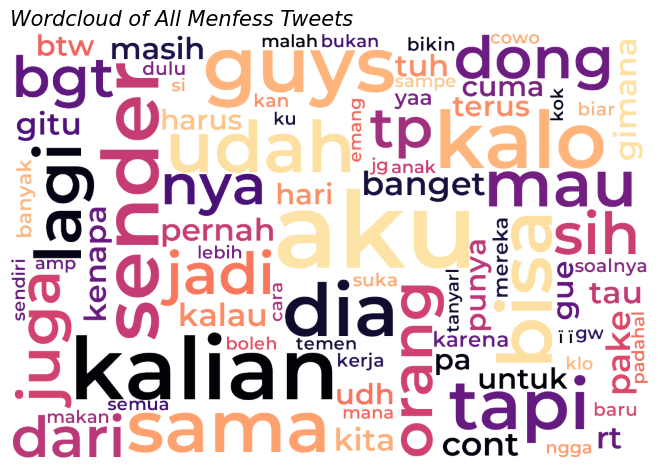

In [34]:
df_all_menfess_text = df_all_menfess_account['text'].apply(lambda y: ''.join(filter(lambda x: x in string.printable, y)))
df_all_menfess_text = df_all_menfess_account['text'].apply(html.unescape)
df_all_menfess_text = df_all_menfess_account['text'].apply(text_processing)
wc(words(df_all_menfess_text), 'Wordcloud of All Menfess Tweets', ['ð', 'ðð', 'dan', 'yang', 'yg', 'itu', 'ada', 'ga', 'di', 
                                                                'ya', 'ini', 'beer', 'gak', 'buat', 'apa', 'atau', 'askrl','aja', 'ke'])

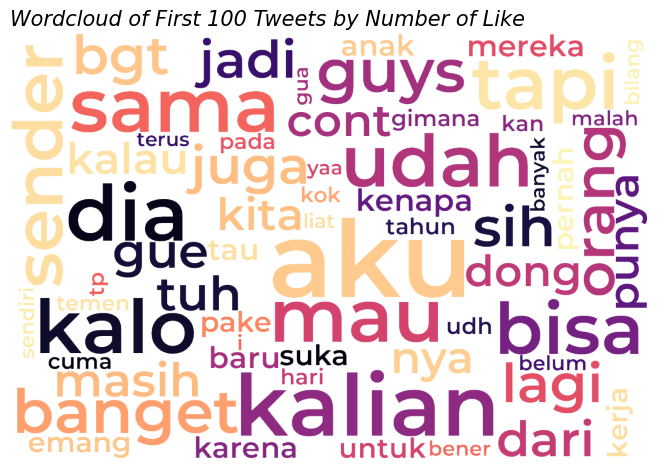

In [35]:
# Likes
df_top100_by_likes = df_all_menfess_account.groupby(['uname'])[['likes', 'text']].apply(lambda x: x.nlargest(100,['likes']))
df_top100_by_likes = df_top100_by_likes['text'].apply(lambda y: ''.join(filter(lambda x: x in string.printable, y)))
df_top100_by_likes = df_top100_by_likes.apply(html.unescape)
df_top100_by_likes = df_top100_by_likes.apply(text_processing)
wc(words(df_top100_by_likes), 'Wordcloud of First 100 Tweets by Number of Like',
    ['ð', 'ðð', 'dan', 'yang', 'yg', 'itu', 'ada', 'ga', 'di', 'ya', 'ini', 'beer', 'gak', 'buat', 'apa', 'atau', 'askrl','aja', 'ke'])

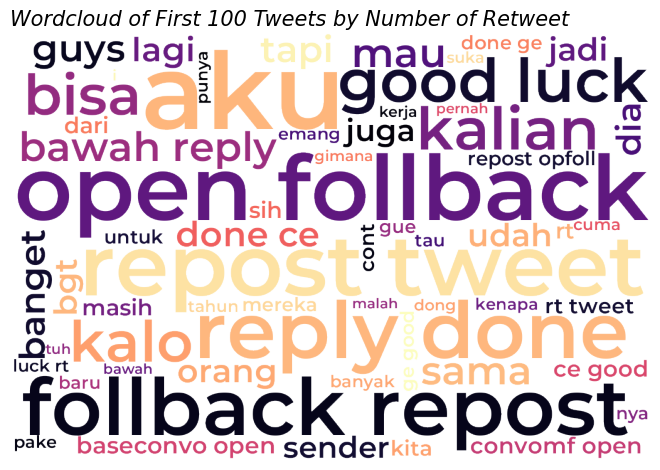

In [36]:
# Retweet
df_top100_by_likes = df_all_menfess_account.groupby(['uname'])[['retweet_count', 'text']].apply(lambda x: x.nlargest(100,['retweet_count']))
df_top100_by_likes = df_top100_by_likes['text'].apply(lambda y: ''.join(filter(lambda x: x in string.printable, y)))
df_top100_by_likes = df_top100_by_likes.apply(html.unescape)
df_top100_by_likes = df_top100_by_likes.apply(text_processing)
wc(words(df_top100_by_likes), 'Wordcloud of First 100 Tweets by Number of Retweet',
    ['ð', 'ðð', 'dan', 'yang', 'yg', 'itu', 'ada', 'ga', 'di', 'ya', 'ini', 'beer', 'gak', 'buat', 'apa', 'atau', 'askrl','aja', 'ke'])


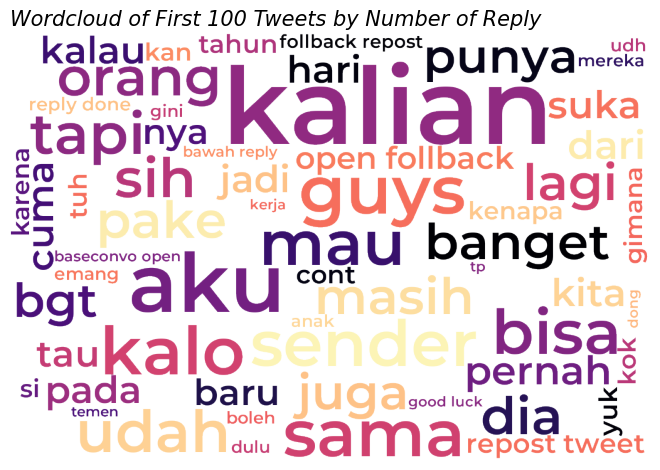

In [37]:
# Reply
df_top100_by_likes = df_all_menfess_account.groupby(['uname'])[['reply_count', 'text']].apply(lambda x: x.nlargest(100,['reply_count']))
df_top100_by_likes = df_top100_by_likes['text'].apply(lambda y: ''.join(filter(lambda x: x in string.printable, y)))
df_top100_by_likes = df_top100_by_likes.apply(html.unescape)
df_top100_by_likes = df_top100_by_likes.apply(text_processing)
wc(words(df_top100_by_likes), 'Wordcloud of First 100 Tweets by Number of Reply',
    ['ð', 'ðð', 'dan', 'yang', 'yg', 'itu', 'ada', 'ga', 'di', 'ya', 'ini', 'beer', 'gak', 'buat', 'apa', 'atau', 'askrl','aja', 'ke'])


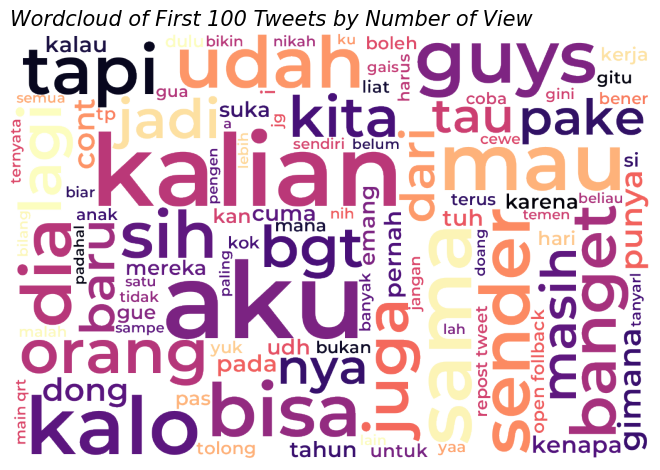

In [38]:
# View
df_top100_by_likes = df_all_menfess_account.groupby(['uname'])[['view_count', 'text']].apply(lambda x: x.nlargest(100,['view_count']))
df_top100_by_likes = df_top100_by_likes['text'].apply(lambda y: ''.join(filter(lambda x: x in string.printable, y)))
df_top100_by_likes = df_top100_by_likes.apply(html.unescape)
df_top100_by_likes = df_top100_by_likes.apply(text_processing)
wc(words(df_top100_by_likes), 'Wordcloud of First 100 Tweets by Number of View',
    ['ð', 'ðð', 'dan', 'yang', 'yg', 'itu', 'ada', 'ga', 'di', 'ya', 'ini', 'beer', 'gak', 'buat', 'apa', 'atau', 'askrl','aja', 'ke'])


# Social Network Preprocessing

In [69]:
import networkx as nx
import re
import numpy as np

In [136]:
d = pd.read_csv('twikit.csv')
# d = d.dropna(subset=['reply'])

In [137]:
d.head(5)

,uname,text,date,reply,place,view_count
0,BolaBolaSepak_,"Kamari🥹, sedih bgt liat kamu bisa senyum gitu ...",2024-07-21 09:41:41+00:00,NaN,NaN,68026
1,BolaBolaSepak_,Nyesek Liat Kak Jennifer pelukan sama Yaya🥹😭\n...,2024-07-21 08:20:24+00:00,NaN,NaN,221964
2,bigsecretw0rld,we love you Jennifer and Kamari 🥹❤️ \nRest in ...,2024-07-21 08:36:22+00:00,NaN,NaN,205344
3,Binda_6,you are so lucky to have a good father papa da...,2024-07-20 14:02:24+00:00,NaN,NaN,126256
4,BolaBolaSepak_,"kuajari kau berdiri ditanganku, dan melangkah ...",2024-07-21 07:17:48+00:00,NaN,NaN,336538


In [141]:
G_mention = nx.DiGraph()

# loop through each row
for r in d.iterrows():
    author = r[1]['uname']
    author = f'@{author}'
    # print(author)
    
    text = r[1]['text']
    
    try:
        timestamp = pd.to_datetime(r[1]['date'])
    except:
        continue

    # use regular expressions to extract and mentions
    mentions = set(re.findall(r"@\w+", text))
    # print(mentions)

    # add the users if there are any mentioned in the text
    if len(mentions) > 0:
        for u in mentions:
            u = f'{u}'
            G_mention.add_edge(author, u, timestamp=timestamp)

@BolaBolaSepak_
@BolaBolaSepak_
@bigsecretw0rld
@Binda_6
@BolaBolaSepak_
@shiningjaemz
@nxeyszlaura
@BolaBolaSepak_
@BolaBolaSepak_
@idolsapaaja
@skyseblu
@AndrewsTjan
@jjhoneyss
@milonions
@skyseblu
@BolaBolaSepak_
@milonions
@lRukakawai
@steqward
@BolaBolaSepak_
@BolaBolaSepak_
@bigsecretw0rld
@Binda_6
@BolaBolaSepak_
@shiningjaemz
@nxeyszlaura
@BolaBolaSepak_
@BolaBolaSepak_
@idolsapaaja
@skyseblu
@AndrewsTjan
@jjhoneyss
@milonions
@skyseblu
@BolaBolaSepak_
@milonions
@lRukakawai
@steqward
@BolaBolaSepak_
@BolaBolaSepak_
@bigsecretw0rld
@Binda_6
@BolaBolaSepak_
@shiningjaemz
@nxeyszlaura
@BolaBolaSepak_
@BolaBolaSepak_
@idolsapaaja
@skyseblu
@AndrewsTjan
@jjhoneyss
@milonions
@skyseblu
@BolaBolaSepak_
@milonions
@lRukakawai
@steqward
@BolaBolaSepak_
@BolaBolaSepak_
@bigsecretw0rld
@Binda_6
@BolaBolaSepak_
@shiningjaemz
@nxeyszlaura
@BolaBolaSepak_
@BolaBolaSepak_
@idolsapaaja
@skyseblu
@AndrewsTjan
@jjhoneyss
@milonions
@skyseblu
@BolaBolaSepak_
@milonions
@lRukakawai
@steqward
@Bol

In [114]:
G_mention = nx.DiGraph()

# loop through each row
for r in d.iterrows():
    author = r[1]['uname']
    author = f'@{author}'
    
    text = r[1]['text']

    # use regular expressions to extract and mentions
    mentions = set(re.findall(r"@\w+", text))

    # add the users if there are any mentioned in the text
    if len(mentions) > 0:
        for u in mentions:
            u = f'{u}'
            G_mention.add_edge(author, u)

In [103]:
G_mention

In [139]:
df_mention = nx.to_pandas_edgelist(G_mention)
df_mention.to_csv('mention.csv', index=False)
